# Cadenas de Markov en tiempo discreto

Una empresa peñalolina se dedica a la elaboración de vacunas para distintas enfermedades.

Para el proceso de creación de una vacuna se cuenta con diversos pasos para lograr conseguir su aprobación final.

Al partir, todas las vacunas parten en una etapa denominada I. La evolución de las vacunas tiene el siguiente comportamiento. 

+ En la etapa I existe una probabilidad de 0.6 de que la vacuna se demuestre ineficaz y se descarte, mientras que con probabilidad 0.4 avanzará a etapa II. 

+ En la etapa II existe una probabilidad 0.6 de que no se logre determinar la validez de la vacuna y vuelva a fase I, mientras que con probabilidad 0.4 avanzará a fase III. En la fase III la situación es análoga a la fase II, con probabilidad 0.6 falla y vuelve a fase I y con probabilidad 0.4 avanza a fase IV.

+ En la fase IV las vacunas ya se consideran seguras para su uso, sin embargo, la aparición de nuevas cepas puede hacer que se vuelvan menos efectivas. Debido a esto, cada tres meses las vacunas en fase IV deben ser pasar una inspección y en caso de fallar, con probabilidad 0.5, deben ser reacondicionadas durante 3 meses hasta que vuelven a estar en funcionamiento.

Considere que cada periodo en una fase tiene una duración de tres meses. Considerando esto y que $X_t$ corresponde a la etapa en la que está la vacuna, se ha generado el siguiente grafo representando la situación:

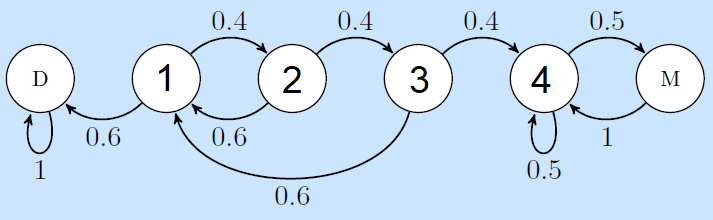

Considerando el grafo asociado, genere la matriz de probabilidad de transición.

In [1]:
import numpy as np
import numpy.linalg as linalg

In [2]:
P = np.array([[1, 0, 0, 0, 0, 0],
              [0.6, 0, 0.4, 0, 0, 0],
              [0, 0.6, 0, 0.4, 0, 0],
              [0, 0.6, 0, 0, 0.4, 0],
              [0, 0, 0, 0, 0.5, 0.5],
              [0, 0, 0, 0, 1, 0]])
print(P)

[[1.  0.  0.  0.  0.  0. ]
 [0.6 0.  0.4 0.  0.  0. ]
 [0.  0.6 0.  0.4 0.  0. ]
 [0.  0.6 0.  0.  0.4 0. ]
 [0.  0.  0.  0.  0.5 0.5]
 [0.  0.  0.  0.  1.  0. ]]


Genere un código que permita determinar la cantidad de vacunas esperadas en cada fase, luego de n trimestres, considerando inicialamente k vacunas en fase I.

Recuerde que $\pi(n) = \pi(0)P^n$

In [3]:
def funcion1(k,P,n):
    pi_0 = np.array([0,1,0,0,0,0])
    Pn = linalg.matrix_power(P,n)
    pi_n = np.matmul(pi_0,Pn)
    res = k*pi_n
    return res

Ocupe el codigo creado anteriormente para determinar la cantidad de vacunas esperada que se estarán siendo usadas luego de 2 años si inicialmente se parte con 100 vacunas en la fase I.

In [4]:
r=funcion1(100,P,8)
print(r)

[88.758528  0.995328  0.663552  0.36864   6.100032  3.11392 ]


De esta forma, en promedio habrá 6,1 vacunas siendo usadas. (Notar que es un valor esperado, por eso consideramos fraccionario el número y podemos hablar de 6,1).

Genere un código que permita determinar la cantidad de vacunas esperadas en cada fase, luego de n trimestres, considerando inicialamente una cantidad dada de vacunas en cada fase, es decir.

In [5]:
#Consideremos un vector con la cantidad de personas en cada estado
def funcion2(P,n,ini):
    pi_0 = ini/np.sum(ini)
    Pn = linalg.matrix_power(P,n)
    pi_n = np.matmul(pi_0,Pn)
    res = np.sum(ini)*pi_n
    return res

Considere que inicialmente se tienen 10 vacunas en fase I, 5 en fase II, 3 en fase III, 7 en fase IV y 10 en etapa de mejora. Determine la cantidad esperada de vacunas descartadas y en mejora que habrá luego de 10 trimestres.

In [6]:
ini = np.array([0,10,5,3,7,10])
funcion2(P,10,ini)

array([14.32690852,  0.08148419,  0.05184553,  0.03308913, 13.67003054,
        6.8366421 ])

Así, tendremos, en promedio, 13,67 vacunas siendo usadas y 6,8 siendo en mejora.

### Determine la probabilidad de que una vacuna termine descartada partiendo en fase I, fase II y fase III.

Para esto debemos recordar el sistema de ecuaciones que permite solucionar este problema. Sabemos que dado un estado $j$ absorbente,

$$f_{i,j} = \sum_{k \in S} p_{i,k}f_{k,j}$$

donde $f_{i,i}=1$ y $f_{i,j}=0$ si $i$ y $j$ pertenecen a clases recurrentes distintas y $S$ es el conjunto de los estados posibles. 

Es posible analizar la probabilidad de alcanzar alguna vez una clase recurrente de forma similar, lo que está dado por la matriz $f$, con

$$F = TF + Q   \Rightarrow F = (I-T)^{-1}Q$$

donde $f_{i,c}$ es la probabilidad de ir alguna vez desde el estado $i$ a la clase recurrente $c$, $T$ es la submatriz de los estados transientes de la matriz de transición y $Q$ es la matriz de probabilidad de ir (en una transición) desde estados transientes a clases recurrentes.

Así, en nuestro caso 

$F = \begin{bmatrix} f_{1,\{D\}} & f_{1,\{4,M\}} \\
f_{2, \{D\} } & f_{2, \{4,M\} } 
\\ f_{3,\{D\}} & f_{3,\{4,M\}} 
\end{bmatrix} \hspace{1cm} T= 
\begin{bmatrix} p_{1,1} & p_{1,2} & p_{1,3} \\
p_{2,1} & p_{2,2} & p_{2,3} \\
p_{3,1} & p_{3,2} & p_{3,3} \\  \end{bmatrix}
\hspace{1cm}  Q =
\begin{bmatrix} p_{1,\{D\}} & p_{1,\{4,M\}} \\
p_{2,\{D\}} & p_{2,\{4,M\}}  \\
p_{3,\{D\}} & p_{3,\{4,M\}}  \\  \end{bmatrix}$

Calculemos ahora con Python




In [7]:
T = np.array([[0, 0.4, 0],
            [ 0.6, 0, 0.4],
            [ 0.6, 0, 0]])
Q = np.array([[0.6, 0],
              [0,0],
              [0,0.4]])

In [8]:
def prob_visita(T,Q):
    r,c = np.shape(T)
    aux1 = np.eye(r)-T
    aux2 = np.linalg.inv(aux1)
    f = np.matmul(aux2,Q)
    return f

In [9]:
prob_visita(T,Q)

array([[0.90361446, 0.09638554],
       [0.75903614, 0.24096386],
       [0.54216867, 0.45783133]])

De esta forma, notamos que la probabilidad de que una vacuna en fase I termine descartada es 0.9 mientras que para una vacuna en fase II es de 0.75 y para una vacuna en fase III es de 0.54

Es posible también, de forma matricial, determinar los tiempos de permanencia en un estado transiente partiendo de un estado transiente, y por lo mismo, el tiempo medio de absorción.

Definimos $R=(I-T)^{-1}$, donde $r_{i,j}$ representa el tiempo medio que estará la cadena en el estado $j$, partiendo del estado $i$, antes de llegar a una clase recurrente. De esta forma, la suma de la fila $i$ es equivalente al tiempo promedio que transcurre, partiendo desde el estado $i$ hasta ser absorbido por una clase recurrente.

Usaremos esta matriz para determinar el tiempo promedio que está una vacuna desde la fase I hasta que termina estando disponible para su uso o descartada.

In [10]:
def tiempo_medio(T):
    r,c = np.shape(T)
    aux1 = np.eye(r)-T
    tiempos = np.linalg.inv(aux1)
    sumas = np.sum(tiempos,1)
    return tiempos,sumas

In [11]:
tiempo_medio(T)

(array([[1.5060241 , 0.60240964, 0.24096386],
        [1.26506024, 1.5060241 , 0.60240964],
        [0.90361446, 0.36144578, 1.14457831]]),
 array([2.34939759, 3.37349398, 2.40963855]))

Así el tiempo es de 2,34 trimestres, en promedio, desde que una vacuna parte en fase I hasta que termina descartada o siendo aprobada para su uso.

NOTA: La demostración de las fórmulas tanto de la matriz f como de la matriz R se encuentran en el documento adjunto a la clase.